-Use the Titanic dataset to build a model that predicts whether a
passenger on the Titanic survived or not. This is a classic beginner
project with readily available data.

-The dataset typically used for this project contains information
about individual passengers, such as their age, gender, ticket
class, fare, cabin, and whether or not they survived.

In [ ]:
#importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
#reading the csv file and loading it into the dataframe
ds=pd.read_csv("/content/drive/MyDrive/CodSoft Internship Program/titanic dataset/Titanic-Dataset.csv")

In [ ]:
ds.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
ds.tail(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [ ]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Dataframe has combination of integer , flot and object datatypes

In [ ]:
print(ds.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


Three of the columns - sex,cabin and embarked have null values

In [ ]:
#dropping the cabin column since it has a lot of missing values and it wouldn't accurately contribute to the model if value is imputed as well.
ds.drop("Cabin",axis=1,inplace=True)
print(ds.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')


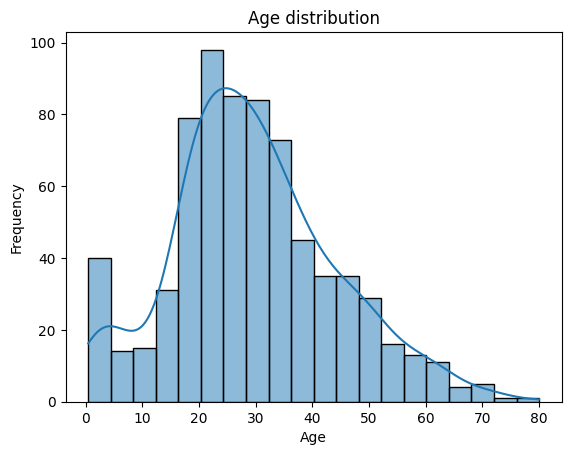

In [ ]:
#now we need to fill the missing values in the column.But the question is if we'll fill the missing value with median or with mean.In order to figure that
#out we need to first look at the distribution of that column for which we will use histogram
sns.histplot(ds["Age"],kde=True)
plt.title("Age distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

this histogram of column "age" is assymetrical therefore using median for imputation.

In [ ]:
ds['Age'].fillna(ds['Age'].median(), inplace=True)


In [ ]:
#since the embarked column is a categorical column and has low missing values,so we will impute the value with mode
ds["Embarked"].fillna(ds["Embarked"].mode,inplace=True)
print(ds.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


In [ ]:
#one-hot encoding
#since all the null values are dealt with.Now converting the categorical values into numerical values i.e binary values.This is done because some machine
#learning algorithms can't process categorical values.
ds=pd.get_dummies(ds,columns=["Sex","Embarked"],drop_first=True)
ds

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,True,False,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,False,True,False,False
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,False,False,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,False,False,False,True
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",27.0,0,0,211536,13.0000,True,False,False,True
887,888,1,1,"Graham, Miss. Margaret Edith",19.0,0,0,112053,30.0000,False,False,False,True
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",28.0,1,2,W./C. 6607,23.4500,False,False,False,True
889,890,1,1,"Behr, Mr. Karl Howell",26.0,0,0,111369,30.0000,True,True,False,False


In [ ]:
# Drop irrelevant columns
ds.drop(['Name', 'Ticket', 'PassengerId'], axis=1, inplace=True)
print(ds.head())


   Survived  Pclass   Age  SibSp  Parch     Fare  Sex_male  Embarked_C  \
0         0       3  22.0      1      0   7.2500      True       False   
1         1       1  38.0      1      0  71.2833     False        True   
2         1       3  26.0      0      0   7.9250     False       False   
3         1       1  35.0      1      0  53.1000     False       False   
4         0       3  35.0      0      0   8.0500      True       False   

   Embarked_Q  Embarked_S  
0       False        True  
1       False       False  
2       False        True  
3       False        True  
4       False        True  


In [ ]:
#Train-Test Split
from sklearn.model_selection import train_test_split

# Define feature matrix X and target vector y
X = ds.drop('Survived', axis=1)
y = ds['Survived']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(712, 9) (179, 9) (712,) (179,)


test_size=0.2 means 20% of the data will be used for testing, and random_state=42 ensures reproducibility.

Shapes of Training and Testing Sets:

X_train.shape: (712, 9)

X_test.shape: (179, 9)

y_train.shape: (712,)

y_test.shape: (179,)

Training Set - used to train the machine learning model

Testing Set - Used to evaluate the model’s performance on unseen data, ensuring that the model generalizes well and isn't overfitting

In [ ]:
#Build and Train a Machine Learning Model
#Logistic Regression: Classification algorithm suitable for binary outcomes

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

# Create a pipeline with scaling and logistic regression
model = make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000))

# Fit the model
model.fit(X_train, y_train)



Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression(max_iter=1000))])

In [ ]:
#evaluate model performance

# Predicting on the test set
y_pred = model.predict(X_test)

# Evaluate the model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Generate classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Generate confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.81

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179


Confusion Matrix:
[[90 15]
 [19 55]]


The logistic regression model  created has 81 percent of accuracy

In [ ]:
#input data
input_data = {
    'Pclass': 3,
    'Age': 25,
    'SibSp': 0,
    'Parch': 0,
    'Fare': 7.25,
    'Sex_male': 1,
    'Sex_female': 0,
    'Embarked_C': 0,
    'Embarked_Q': 0,
    'Embarked_S': 1
}

# Converting to DataFrame
input_df = pd.DataFrame([input_data])

# Ensuring that the input features matches the training data
input_df = input_df[X.columns]

# Predicting the outcome
prediction = model.predict(input_df)
prediction_prob = model.predict_proba(input_df)

# Displaying result
print(f"Prediction: {'Survived' if prediction[0] == 1 else 'Did not survive'}")
print(f"Prediction Probability: {prediction_prob[0]}")


Prediction: Did not survive
Prediction Probability: [0.88702296 0.11297704]


To check the accuracy of the model I created, I employed it on a specific passenger’s information. According to the model, The model predicted that the passenger did not survive, with a high probability of 88.7% for not surviving and 11.3% for surviving.